<a href="https://colab.research.google.com/github/williamokomba/DSC6_Moringa_School_week9_IP/blob/main/DSC6_week__9_a_IP_Moringa_school_20_12__William_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Moringa Data science core week 9 Independent project: KNN**

## 1.0 Defining the Question

**Dataset provided**

* Train Dataset [link](https://archive.org/download/train5_202002/train%20%285%29.csv)
* Test Dataset [link text](https://archive.org/download/test1_202002/test%20%281%29.csv)

  Data grossary


* **Name** : Name of the passenger
* **survival**: Survival; 0 = No, 1 = Yes

* **pclass**: Ticket class ; 1 = 1st, 2 = 2nd, 3 = 3rd

* **sex**: Sex

* **Age**: Age in years

* **sibsp**: number of siblings / spouses aboard the Titanic

* **parch**: `number of parents / children aboard the Titanic`

* **ticket**: Ticket number

* **fare**: Passenger fare

* **cabin**: Cabin number

* **embarked**: Port of Embarkation ; C = Cherbourg, Q = Queenstown, S = Southampton



###1.1 Specifying the data analytic question

To predict if a passenger survived the sinking of the Titanic or not.

### 1.2 Defining the metric for success

identify the score in percentage of passengers that are correctly predicted, known as accuracy.

### 1.3 Understanding the Context

Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest unforgatable commercial marine disasters.

### 1.4 Recording the Experimental Design

* upload and read our csv files
* clean our dataset
* perfom EDA
* build our models using KNN
* challenge our solueion
* Evaluate their performance on the dataset at hand and then provide observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem.

### 1.5 Assessing the Relevance of the Data

the data are rellevant as it has all data and values related to the passanger and accident.

## 2.Loading and reading Our Datasets

In [179]:
#importing our necessary libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
#
#Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
#
%matplotlib inline

In [180]:
#loading and reading the datasets
#
train_df=pd.read_csv("/content/train.csv")
#
test_df=pd.read_csv("/content/test.csv")


## 3. Checking the Data

In [181]:
# Determining the no. of records in our result dataset
#
print("train_dataset shape", train_df.shape)
print("-"*30)
print("test_dataset shape", train_df.shape)

train_dataset shape (891, 12)
------------------------------
test_dataset shape (891, 12)


**observation**: both datsets has 891 records and 12 variables.

In [182]:
# Previewing the top 5 of our train_df dataset
#
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [183]:
# Previewing the bottom of our train_df dataset
#
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**observation**, the dataset is uniform from top to bottom.

In [184]:
# Checking whether each column has an appropriate datatype
#
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**observartion**: dataset has integers, float and string data type. cabin variable has many mising values.

## 4. External Data Source Validation

### a. Validation

* the data was valid since it can be confirmed on Kaggle which is the trusted open data source, and also based on other international publications.

## 5. Tidying the Dataset

In [185]:
#Data validity
#checking for irrelevant colunms
#
train_df1=train_df.copy()
#
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
#checking colunms with lots of missing variables
#
train_df1.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
C54            1
B3             1
A24            1
C99            1
D48            1
Name: Cabin, Length: 147, dtype: int64

In [187]:
#Dropping irrelevant 'PassengerId', 'Name' and 'Cabin'
#
train_df1.drop(['PassengerId','Name','Cabin'], axis=1, inplace=True)
train_df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


**observation** passager id and name were dropped since they won't be rellevant in the analysis. cabin was dropped since it has more than 25% of missing values(has 77.7% of the missing values).

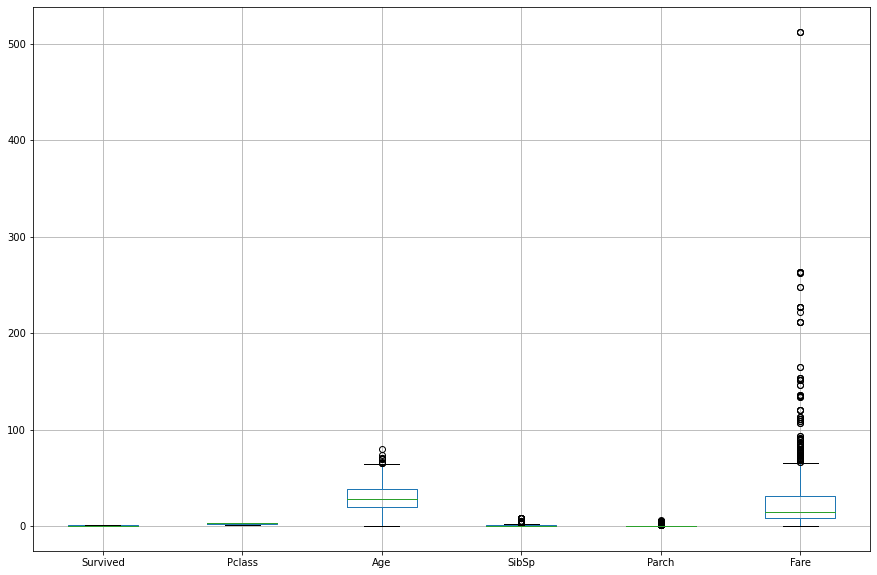

In [188]:
#Accuracy
#checking for outliers
#
plt.figure(figsize = (15, 10))
train_df1.boxplot()
plt.show()

**observation** : there are outliers in age, sibsp, perch and fare, but they looks genuine thus we won't remove them.

In [189]:
# Completeness
#
# Identifying the Missing Data
#
train_df1.isnull().sum().sum()

179

In [190]:
# dealing with missing values
#dropping missing values
#
train_df1=train_df1.dropna()
#
#confirming the dropna function worked
#
train_df1.isnull().sum(). any()

False

In [191]:
#consistency
#
# looking for duplicates
#
train_df1.duplicated().sum()

3

In [192]:
#dropping duplicates
#
train_df1 = train_df1.drop_duplicates()
#
#confirming duplicates have been dropped
#
train_df1.duplicated().sum().any()

False

In [193]:
#uniformity
#
#standardization
#fixing messy colunms names, names with upper case, space and white space
#
#nothing  to be fixed, all colunms are named correctly
#
train_df1.columns = train_df1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

#clean dtaset
#
train_df2=train_df1.copy()
#
train_df2.head()


,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


## 6. Exploratory Data Analysis

### Univariate Analysis.

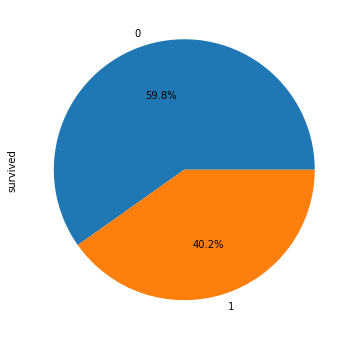

In [194]:
#univariate analysis: survived variable piechart
#
plt.figure(figsize = (6, 6))
train_df2.survived.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

**obervarvation**: there were more passangers who did not survive. 

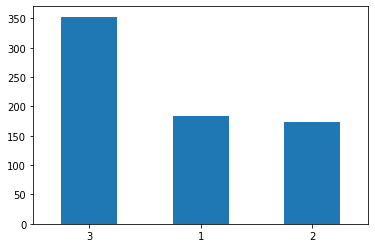

In [195]:
# univariate analysis: passanger class  variable bar graph
#
train_df2.pclass.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**: we had more passangers in 3rd class.

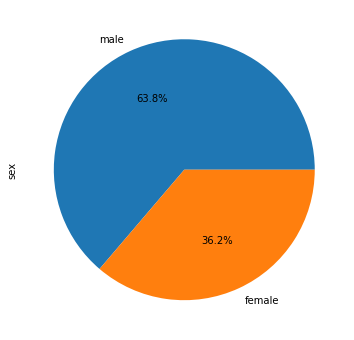

In [196]:
#univariate analysis: sex variable piechart
#
plt.figure(figsize = (6, 6))
train_df2.sex.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

**observation**: we had more male than female on board.

In [197]:
# univariate analysis: age variable histogram
#
#obtaining mode, median, range for age variable
#
train_df2["age"].describe()


count    709.000000
mean      29.687475
std       14.481064
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [198]:
a=train_df2['age'].max()
b=train_df2['age'].min()
range = a-b
print("Age range", range)

Age range 79.58


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


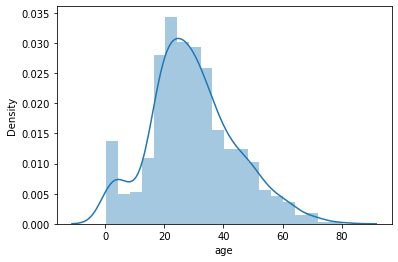

In [199]:
## univariate analysis: age variable distplot
#
plt.figure(figsize = (6, 4))
sns.distplot(train_df2.age);

**observation**:
* distribution of age is close to normal distribution. there were more records of passagers aged between  19 to 25 years. meaning these were the most respodents.
* the mean age was 30years
* the minimun age of the passanger onboard was 4 months.
* the maximum age of the passanger onboard  was 80years
* the age range was 79 years and 6 months.


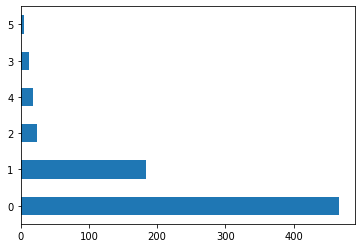

In [200]:
# univariate analysis: number of siblings / spouses aboard the Titanic variable bar graph
#
train_df2.sibsp.value_counts().plot(kind = 'barh', rot = 0)
plt.show()

**observation**: many of the passangers were single(did not have siblings/spouse)

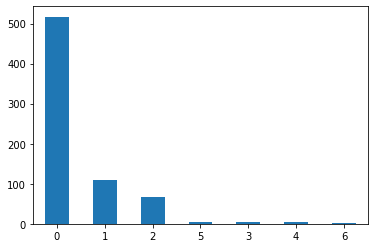

In [201]:
# univariate analysis: number of parents / children aboard the Titanic variable bar graph
#
train_df2.parch.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**: most of the passangers onboard were not parents.

In [202]:
# getting the median, maximum, minimum of fare variable
#
train_df2['fare'].describe()

count    709.000000
mean      34.508927
std       53.025069
min        0.000000
25%        8.050000
50%       15.500000
75%       32.500000
max      512.329200
Name: fare, dtype: float64

(array([374., 162.,  40.,  37.,  36.,  12.,  10.,  10.,   8.,   2.,   0.,
          0.,   4.,   3.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <a list of 30 Patch objects>)

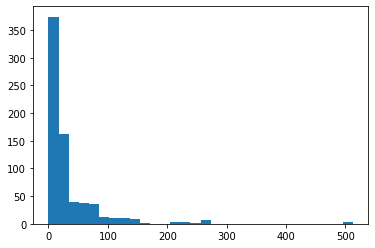

In [203]:
fare_hist =train_df2['fare']
plt.hist(fare_hist, bins=30, histtype='bar', rwidth=2)

**observation**: 
* the mean fare was 34.5
* maximum fare was 512 and minimum was zero; meaning other passangers did not pay to board titanic.
* price didtributed is skewed to the right.

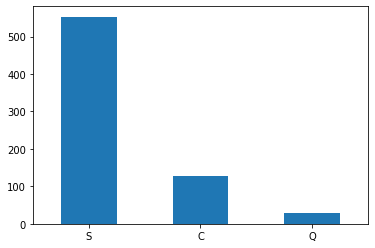

In [204]:
# univariate analysis: embarked variable bar graph
#
train_df2.embarked.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation** most passangers on board wer to embark at  Southampton.

### Bivariate analysis

We now perform bivariate analysis, which is a type of analysis that involves two variables. The main objective is to understand the relationships between these two types of variables

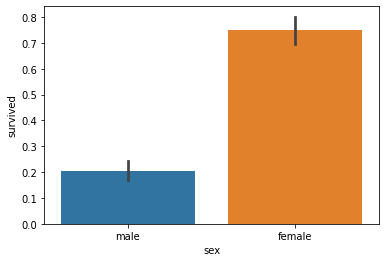

In [205]:
#sex by survived.
#
sns.barplot(x="sex", y="survived", data=train_df2)
plt.show()

**observation**: more female servived compared to mele.

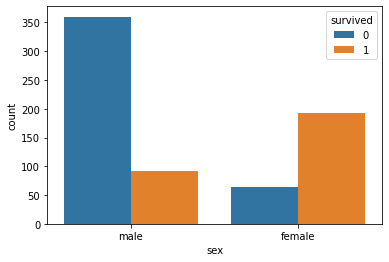

In [206]:
# sex vs survived comparison 
sns.countplot(x = 'sex', hue = 'survived', data = train_df2)
plt.show()

**observation**:
* number of males were greater than number of females.
* but number of males who survived were less than the number of females who survived

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


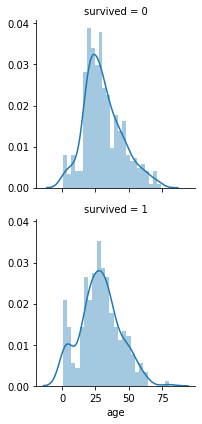

In [207]:
# age vs survived
sur_df2=train_df2
sur_df2= sns.FacetGrid(train_df2, row="survived")
sur_df2.map(sns.distplot, "age", bins=25)
plt.show()

**observation**: most of those who survived were aged between 25 to 30 years.

Text(0.5, 1.0, 'Pclass Distribution - Survived vs Non-Survived')

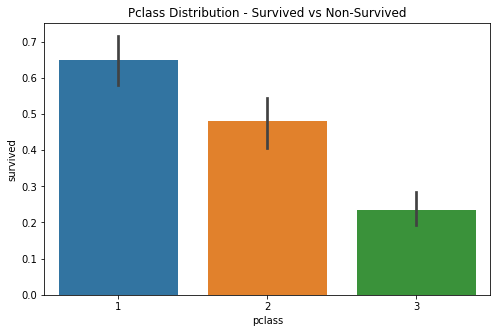

In [208]:
#passanger class vs survive
#
plt.subplots(figsize = (8,5))
sns.barplot(x = "pclass", y = "survived", data=train_df2)
plt.title("Pclass Distribution - Survived vs Non-Survived")

**observation**: more passangers in the 1st class survived.

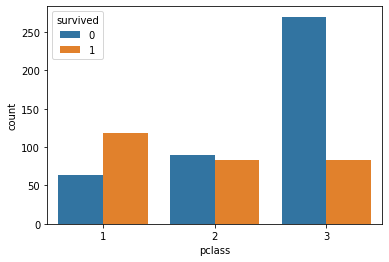

In [209]:
# pclass vs survived comparison 
sns.countplot(x = 'pclass', hue = 'survived', data = train_df2)
plt.show()

**observation**
* The number of Passengers in Pclass 3 were very higher but less survived.

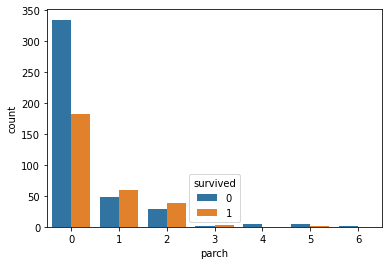

In [210]:
# perch vs servived
#
sns.countplot(x = 'parch', hue = 'survived', data = train_df2)
plt.show()

**Observation**: majority of those without parents/guardians did not survice.

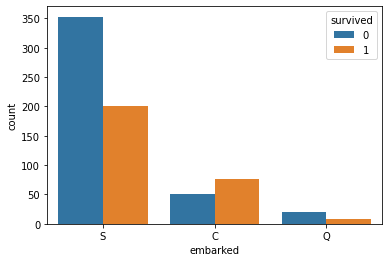

In [211]:
# embarked vs survived comparison
#
sns.countplot(x = 'embarked', hue = 'survived', data = train_df2)
plt.show()


**observation**: most of those who embarked at Southampton did not survive.

## 7. Feature engineering

In [212]:
#converting sex and embarked colunms  to numeric
# 1 is male, 0 is female for sex
train_df2['sex'].replace(['male', 'female'],[1,0],inplace=True)
#
#C = Cherbourg as -1, Q = Queenstown as 0, S = Southampton as 1
train_df2['embarked'].replace(['C', 'Q', 'S'],[-1,0,1],inplace=True)

In [213]:
# Computing the correlation matrix 
#
# This is the association between numerical variables in the dataset
#
train_df2.corr()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
survived,1.000000,-0.359123,-0.536737,-0.079122,-0.016453,0.096227,0.265719,-0.177490
pclass,-0.359123,1.000000,0.149628,-0.366436,0.063012,0.022485,-0.553451,0.243981
sex,-0.536737,0.149628,1.000000,0.094976,-0.104296,-0.249595,-0.182824,0.102378
age,-0.079122,-0.366436,0.094976,1.000000,-0.304616,-0.186869,0.092916,-0.039924
sibsp,-0.016453,0.063012,-0.104296,-0.304616,1.000000,0.382165,0.141724,0.036786
parch,0.096227,0.022485,-0.249595,-0.186869,0.382165,1.000000,0.207897,0.012711
fare,0.265719,-0.553451,-0.182824,0.092916,0.141724,0.207897,1.000000,-0.284629
embarked,-0.177490,0.243981,0.102378,-0.039924,0.036786,0.012711,-0.284629,1.000000


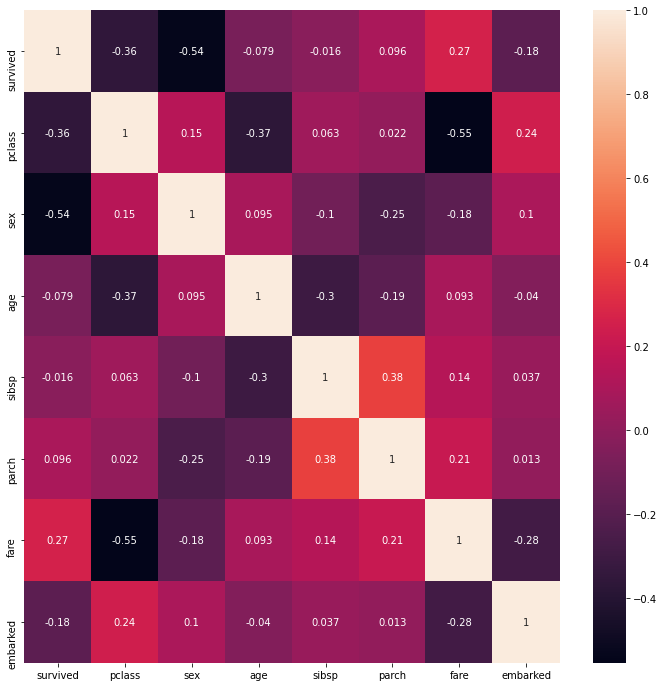

In [214]:
plt.subplots(figsize=(12,12))
sns.heatmap(train_df2.corr(),annot=True)

## Modeling

###K-nearest neighbor classification
* this solves classification problems by storing all available cases and classifies new cases by majority vote of its K-neighbor.

 **limitation**
 * The accuracy of the algorithm depends on the quality of data
 * one needs to find an optimal k value(number of nearest neighbor)
 * It's poor at classifying data points in a boundary where they can be classified one way or another.

**a. spliting our data 80-20**

In [215]:
# Splitting our dataset into features/ indepedent and labels/ target variables
#
#The X contains attributes while y contains the labels.
X = train_df2[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].values
y = train_df2['survived'].values


In [216]:
# #splitting our dataset to training and test data
#
# Training the model using 80% of the data and testing it with 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**interpretaion**:

* X_train: independent/input feature for training the model
* y_train: dependent/ target/ output feature for training the model
* X_test: independent/input feature for testing the model, will be used to predict the output value
* y_test: original depedent/output values of t-test, we'll compare this values with our predicted values to check the performance of our build model.
* train_ size= percentage of the data will go to training and  test. set.
* random_state= this fix the split i.e there will be the same split each time you ran the code.

In [217]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
#
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [218]:
#finding the best value of k and it must be odd number

math.sqrt(len(y_test))

11.916375287812984

In [219]:
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# # Fitting the KNeighbors classifier model features to the X_train and X_test
# then train the model
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric= 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

**observation:** 
* we used euclidean metric for ordinary straight distance between 2 points and by setting p=2
* our K is 11.

In [220]:
# Predict based on the model we've trained
#
y_pred = classifier.predict(X_test)

In [221]:
# Evaluating the Algorithm
#by checking confusion matrix, classification report and accuracy score.
#
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("model accuracy ",accuracy_score(y_test, y_pred))

[[73  8]
 [18 43]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        81
           1       0.84      0.70      0.77        61

    accuracy                           0.82       142
   macro avg       0.82      0.80      0.81       142
weighted avg       0.82      0.82      0.81       142

model accuracy  0.8169014084507042


**b. spliting our data 70-30**

In [222]:
#The X contains attributes while y contains the labels.
X = train_df2[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].values
y = train_df2['survived'].values

In [223]:
# #splitting our dataset to training and test data
#
# Training the model using 70% of the data and testing it with 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [224]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
#
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [225]:
# Fitting the KNeighbors classifier model features to the X_train and X_test
# then train the model
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric= 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [226]:
# Predict based on the model we've trained
#
y_pred = classifier.predict(X_test)

In [227]:
# Evaluating the Algorithm
#by checking confusion matrix, classification report and accuracy score.
#
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("model accuracy ",accuracy_score(y_test, y_pred))

[[108  15]
 [ 30  60]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       123
           1       0.80      0.67      0.73        90

    accuracy                           0.79       213
   macro avg       0.79      0.77      0.78       213
weighted avg       0.79      0.79      0.79       213

model accuracy  0.7887323943661971


**c. spliting our data 60- 40**

In [228]:
#The X contains attributes while y contains the labels.
X = train_df2[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].values
y = train_df2['survived'].values

In [229]:
# #splitting our dataset to training and test data
#
# Training the model using 60% of the data and testing it with 40%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [230]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
#
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [231]:
# Fitting the KNeighbors classifier model features to the X_train and X_test
# then train the model
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric= 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [232]:
# Predict based on the model we've trained
#
y_pred = classifier.predict(X_test)

In [233]:
# Evaluating the Algorithm
#by checking confusion matrix, classification report and accuracy score.
#
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("model accuracy ",accuracy_score(y_test, y_pred))

[[141  24]
 [ 37  82]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       165
           1       0.77      0.69      0.73       119

    accuracy                           0.79       284
   macro avg       0.78      0.77      0.78       284
weighted avg       0.78      0.79      0.78       284

model accuracy  0.7852112676056338


**observation**: after splitting  our data to 80-20 we get 81.7% accuracy level, 70-30 split gave as 78.9% accuracy, and 60-40 split gave us 78.5%.

* Therefore 80-20 split is the best since it gave the accuracy of 81.7%.

## 9. Follow up questions

1. Did we have the right data?

* Yes

2. Do we need other data to answer our question?

* No

3. we need more data to do away with overfitting.

* The data was enough to anwer the question.

4. Did we have the right question?

* yes.